<a href="https://colab.research.google.com/github/Anweshasen98/UAV-Object-Detection-Transfer-Learning_YOLOv8/blob/main/Plotting_Images_With_Original_labels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Plot Images With Original Labels**

# Plot Labels in 3x4 subplots

In [ ]:
#import Libraries
import random
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [ ]:
#Mount Google Drive
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive


/
Mounted at /content/gdrive


In [ ]:
# Defining path for image and label folder
image_dir = "/content/gdrive/MyDrive/yolov4/image"
label_dir = "/content/gdrive/MyDrive/yolov4/label"



In [ ]:
# Get the list of all images and labels
image_files = os.listdir(image_dir)
label_files = os.listdir(label_dir)

In [ ]:
# Create a list of all indices
image_indices = list(range(len(image_files)))
label_indices= list(range(len(label_files)))

In [ ]:
# Randomly select 12 images for training and testing

# Select 12 random indices for training data
train_indices = random.sample(range(len(image_files)), 12)

# Select 12 random indices for testing data
test_indices = random.sample(range(len(image_files)), 12)

# Get the image and label files for training data
train_image_files = [image_files[i] for i in train_indices]
train_label_files = [label_files[i] for i in train_indices]

# Get the image and label files for testing data
test_image_files = [image_files[i] for i in test_indices]
test_label_files = [label_files[i] for i in test_indices]



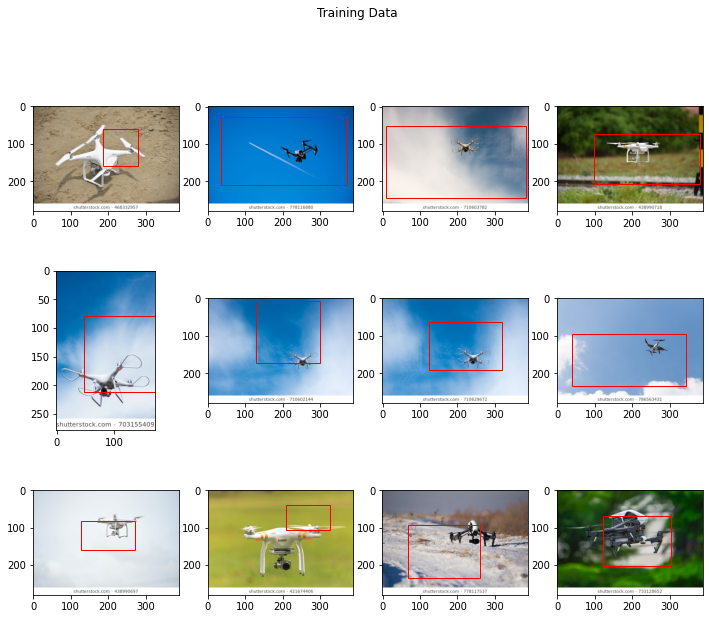

In [ ]:
# Plot the selected training images

fig, axes = plt.subplots(3, 4, figsize=(12, 10))
axes = axes.ravel()

for i, (image_file, label_file) in enumerate(zip(train_image_files, train_label_files)):
    # Load the image
    image = cv2.imread(os.path.join(image_dir, image_file))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Load the label
    with open(os.path.join(label_dir, label_file)) as f:
        label = f.read().strip().split(" ")

    x, y, width, height = [float(val) for val in label[1:]]

    rect = plt.Rectangle((x, y), width, height, linewidth=1, edgecolor='r', facecolor='none')

    # Plot the image in the current subplot
    axes[i].imshow(image)
    # Plot the label on top of the image
    rect = plt.Rectangle((x, y), width, height, linewidth=1, edgecolor='r', facecolor='none')
    axes[i].add_patch(rect)
    #axes[i].set_title(label_file)
    # Show the axis labels
    axes[i].axis("on")

plt.suptitle("Training Data")
plt.show()



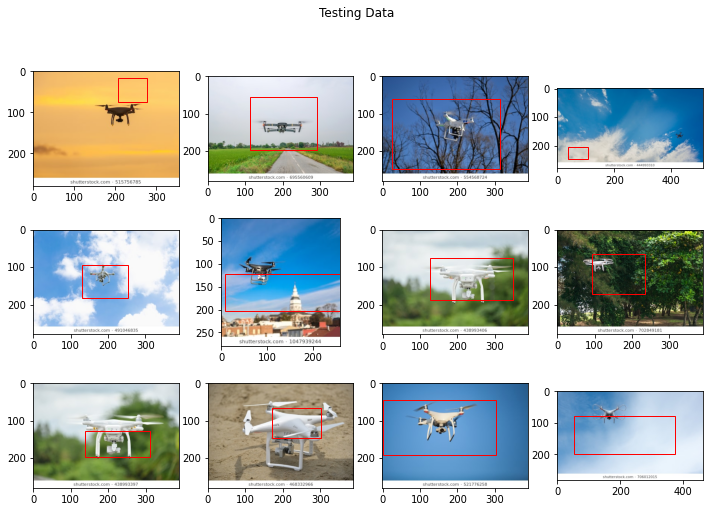

In [ ]:
# Plot the selected testing images
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
axes = axes.ravel()
for i, (image_file, label_file) in enumerate(zip(test_image_files, test_label_files)):
    # Load the image
    image = cv2.imread(os.path.join(image_dir, image_file))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Load the label
    with open(os.path.join(label_dir, label_file)) as f:
        label = f.read().strip().split(" ")

    x, y, width, height = [float(val) for val in label[1:]]

    rect = plt.Rectangle((x, y), width, height, linewidth=1, edgecolor='r', facecolor='none')


    # Plot the image in the current subplot
    axes[i].imshow(image)
    # Plot the label on top of the image
    rect = plt.Rectangle((x, y), width, height, linewidth=1, edgecolor='r', facecolor='none')
    axes[i].add_patch(rect)
    #axes[i].set_title(label_file)
    # Remove the axis labels
    axes[i].axis("on")

plt.suptitle("Testing Data")
plt.show()


End Of Plotting Labels - Label format need to be converted.